In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from astropy.table import Table

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

## TESScut quick lightcurve

In [3]:
# https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=297.788835531591&dec=46.4833913684977&y=15&x=10&units=px&sector=14
# TIC 273589987

In [4]:
file = 'tess-s0014-2-4_297.788836_46.483391_10x15_astrocut.fits'

tbl = Table.read(file, format='fits')

In [5]:
tbl['FLUX'].shape

(1241, 15, 10)

In [6]:
np.sum(tbl['FLUX'], axis=0).shape

(15, 10)

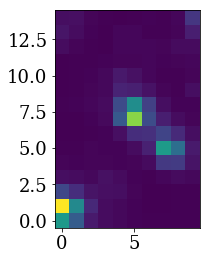

In [7]:
plt.imshow(np.sum(tbl['FLUX'], axis=0), origin='lower')

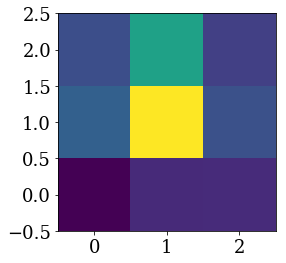

In [8]:
# plt.imshow(np.sum(tbl['FLUX'][:, 4:7, 6:], axis=0), origin='lower')
plt.imshow(np.sum(tbl['FLUX'][:, 6:9, 4:7], axis=0), origin='lower')

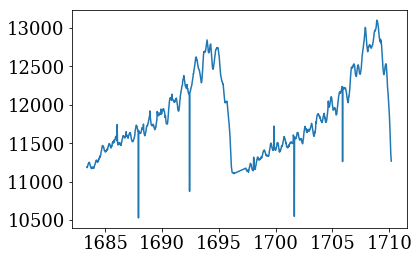

In [9]:
ap = np.nansum(tbl['FLUX'][:, 6:9, 4:7], axis=(1,2))

plt.plot(tbl['TIME'], ap)

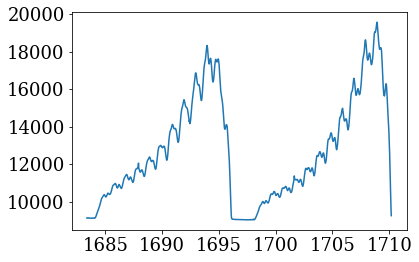

In [10]:
bk = np.nansum(tbl['FLUX'][:, 10:, :], axis=(1,2))
plt.plot(tbl['TIME'], bk)

In [3]:
from astropy import __version__ as v
v

'3.2.1'

In [4]:
import eleanor
eleanor.__version__

'0.2.8'

In [66]:
star = eleanor.Source(tic=273589987, sector=14, tc=True)

Inflating...


In [100]:
star.tic

273589987

In [70]:
data = eleanor.TargetData(star, do_psf=True, do_pca=False) 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



100%|██████████| 1241/1241 [00:17<00:00, 69.44it/s]


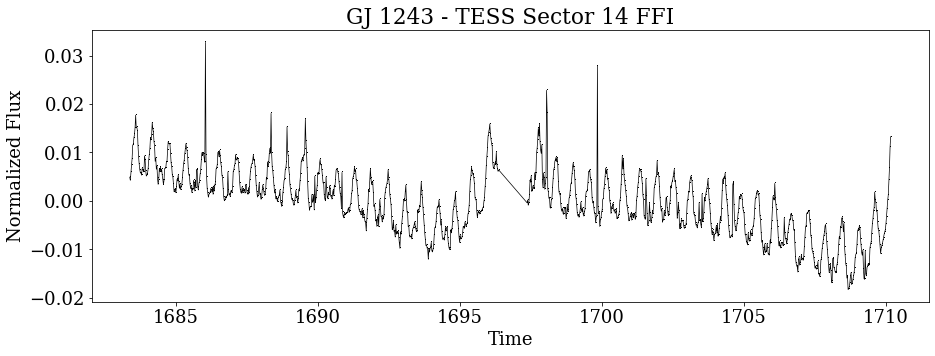

In [86]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 , 'k',marker=',', lw=0.7)

plt.ylabel('Normalized Flux')
plt.xlabel('Time')
plt.title('GJ 1243 - TESS Sector 14 FFI')
plt.savefig('gj1243_tess_rough.png')

In [98]:
# sc = eleanor.Crossmatch.two_minute(star, download=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


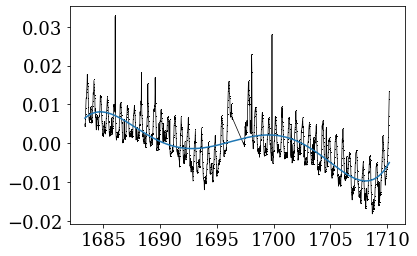

In [118]:
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 , 'k',marker=',', lw=0.7)

ft = np.polyfit(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1, 11)
plt.plot(data.time[q], np.polyval(ft, data.time[q]))

In [72]:
import exoplanet as xo

In [76]:
acf = xo.autocorr_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 )

In [77]:
acf['peaks'][0]['period']

0.582758881519112

In [78]:
lnp = xo.lomb_scargle_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1, 
                                min_period=0.2, max_period=5)

In [79]:
freq, pwr = lnp['periodogram']

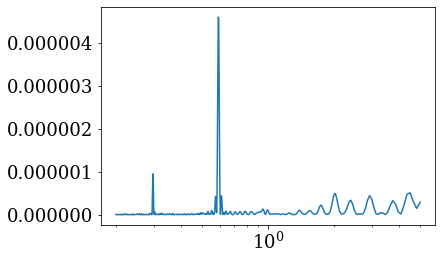

In [80]:
plt.plot(1./freq, pwr)
plt.xscale('log')

In [81]:
lnp['peaks'][0]['period']

0.5922754004818223

In [63]:
period = lnp['peaks'][0]['period']

(-0.02, 0.025)

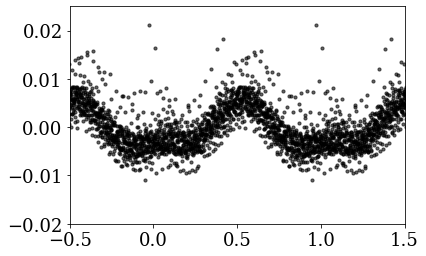

In [122]:

plt.scatter((data.time[q] % period) / period, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % period) / period+1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')
plt.scatter((data.time[q] % period) / period-1, 
            data.psf_flux[q]/np.median(data.psf_flux[q])-1 - np.polyval(ft, data.time[q]), 
            s=10, alpha=0.6, c='k')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.02,0.025)



In [102]:
from lightkurve import search_targetpixelfile

In [103]:
# TessTargetPixelFile()
search_targetpixelfile('273589987', cadence='short', mission='TESS')

SearchResult containing 0 data products.